# Prerequisites

In [9]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from matplotlib.lines import Line2D

In [2]:
fig_dir = "../figures"

# HW

In [5]:
sns.set_theme()
exp_dir = "../models/hw-final"
os.listdir(exp_dir)

['confounder', 'ordinary', 'quarterdata']

## Full

In [96]:
full_dir = f"{exp_dir}/ordinary"
configs = {}
stats = {}
for run in os.listdir(full_dir):
    run_dir = f"{full_dir}/{run}"
    with open(f"{run_dir}/config.json", "r") as f:
        config = json.load(f)
    configs[run] = config
    stats[run] = pd.read_csv(f"{run_dir}/stats.csv", index_col=0)

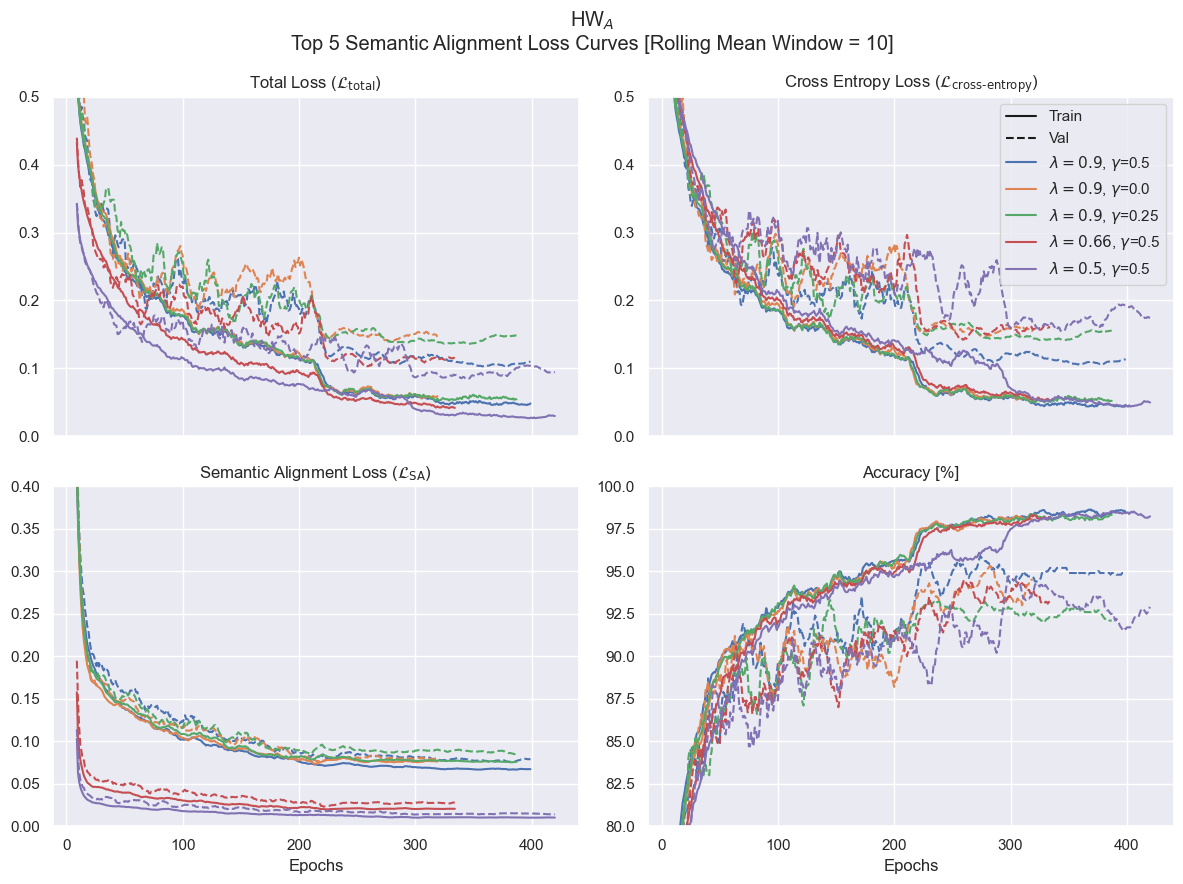

In [115]:
plot_by = lambda config: config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(
    2, 2, figsize=(12, 9), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue
    # print(config)
    lambda_ = config.get("cnt_weight", "")
    gamma = config.get("cnt_cos_weight", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), lambda_, gamma)
    # if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.16:
    #     continue
    if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.175:
        continue

    ax00.plot(stat["train/mean_loss_total_a"].rolling(window=10).mean(), ls="-", c=c)
    ax00.plot(stat["val/mean_loss_total_a"].rolling(window=10).mean(), ls="--", c=c)

    ax01.plot(
        stat["train/mean_loss_ce_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax01.plot(stat["val/mean_loss_ce_a"].rolling(window=10).mean(), ls="--", c=c)

    ax10.plot(
        stat["train/mean_loss_contrast_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax10.plot(stat["val/mean_loss_contrast_a"].rolling(window=10).mean(), ls="--", c=c)

    ax11.plot(
        stat["train/accuracy_a"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax11.plot(stat["val/accuracy_a"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1

ax00.set_title(r"Total Loss ($\mathcal{L}_\text{total}$)")
ax01.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax10.set_title(r"Semantic Alignment Loss ($\mathcal{L}_\text{SA}$)")
ax11.set_title("Accuracy [%]")

ax10.set_xlabel("Epochs")
ax11.set_xlabel("Epochs")

# for ax in (ax00, ax01, ax10, ax11):
#     xmin, xmax = ax.get_xlim()
#     ax.set_xlim(0, xmax + xmin)
ax00.set_ylim(0, 0.5)
ax01.set_ylim(0, 0.5)
ax10.set_ylim(0, 0.4)
ax11.set_ylim(80, 100)
fig.suptitle("HW$_A$\nTop 5 Semantic Alignment Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax01.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax01.legend(handles, labels)
# plt.savefig(f"{fig_dir}/sa_loss_curves_top5.pdf", bbox_inches='tight')

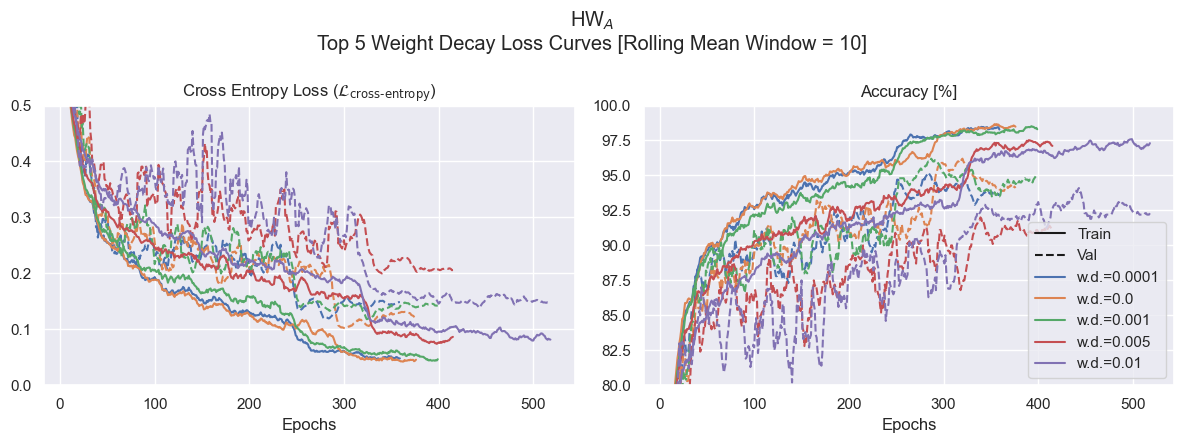

In [117]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.21:
        continue
        
    ax0.plot(
        stat["train/mean_loss_ce_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_a"].rolling(window=10).mean(), ls="--", c=c)

    ax1.plot(
        stat["train/accuracy_a"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_a"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 0.5)
ax1.set_ylim(80, 100)
fig.suptitle("HW$_A$\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax1.legend(handles, labels)
plt.savefig(f"{fig_dir}/hwa_wd_loss_curves_top5.pdf", bbox_inches='tight')

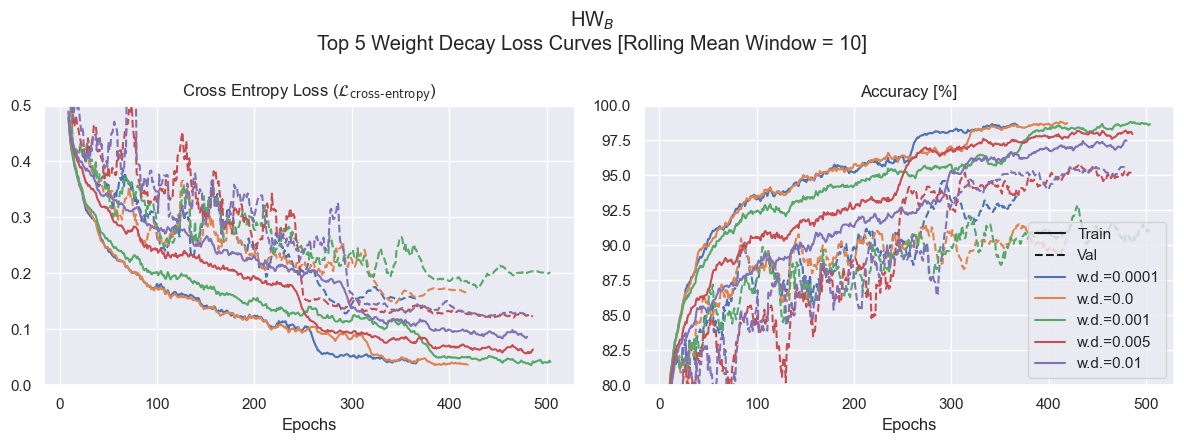

In [120]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    if stat["val/mean_loss_ce_b"].dropna()[-10:].mean() > 0.21:
        continue

    ax0.plot(
        stat["train/mean_loss_ce_b"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_b"].rolling(window=10).mean(), ls="--", c=c)

    ax1.plot(
        stat["train/accuracy_b"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_b"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 0.5)
ax1.set_ylim(80, 100)
fig.suptitle("HW$_B$\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax1.legend(handles, labels)
# plt.savefig(f"{fig_dir}/hwb_wd_loss_curves_top5.pdf", bbox_inches='tight')

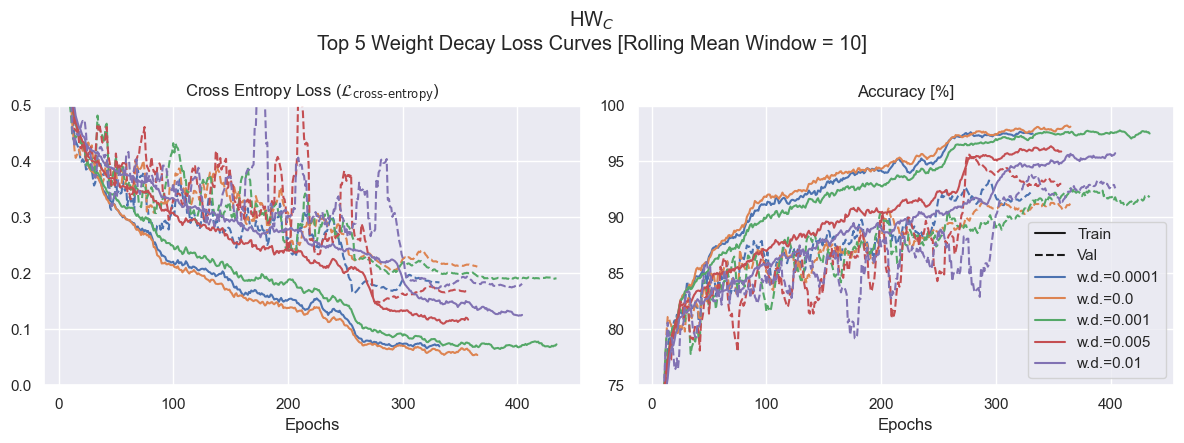

In [126]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_c"].dropna()[-10:].mean(), wd)
    if stat["val/mean_loss_ce_c"].dropna()[-10:].mean() > 0.22:
        continue

    ax0.plot(
        stat["train/mean_loss_ce_c"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_c"].rolling(window=10).mean(), ls="--", c=c)

    ax1.plot(
        stat["train/accuracy_c"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_c"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 0.5)
ax1.set_ylim(75, 100)
fig.suptitle("HW$_C$\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax1.legend(handles, labels)
plt.savefig(f"{fig_dir}/hwc_wd_loss_curves_top5.pdf", bbox_inches='tight')

## Confounder

In [212]:
confounder_dir = f"{exp_dir}/confounder"
configs = {}
stats = {}
for run in os.listdir(confounder_dir):
    run_dir = f"{confounder_dir}/{run}"
    with open(f"{run_dir}/config.json", "r") as f:
        config = json.load(f)
    configs[run] = config
    stats[run] = pd.read_csv(f"{run_dir}/stats.csv", index_col=0)

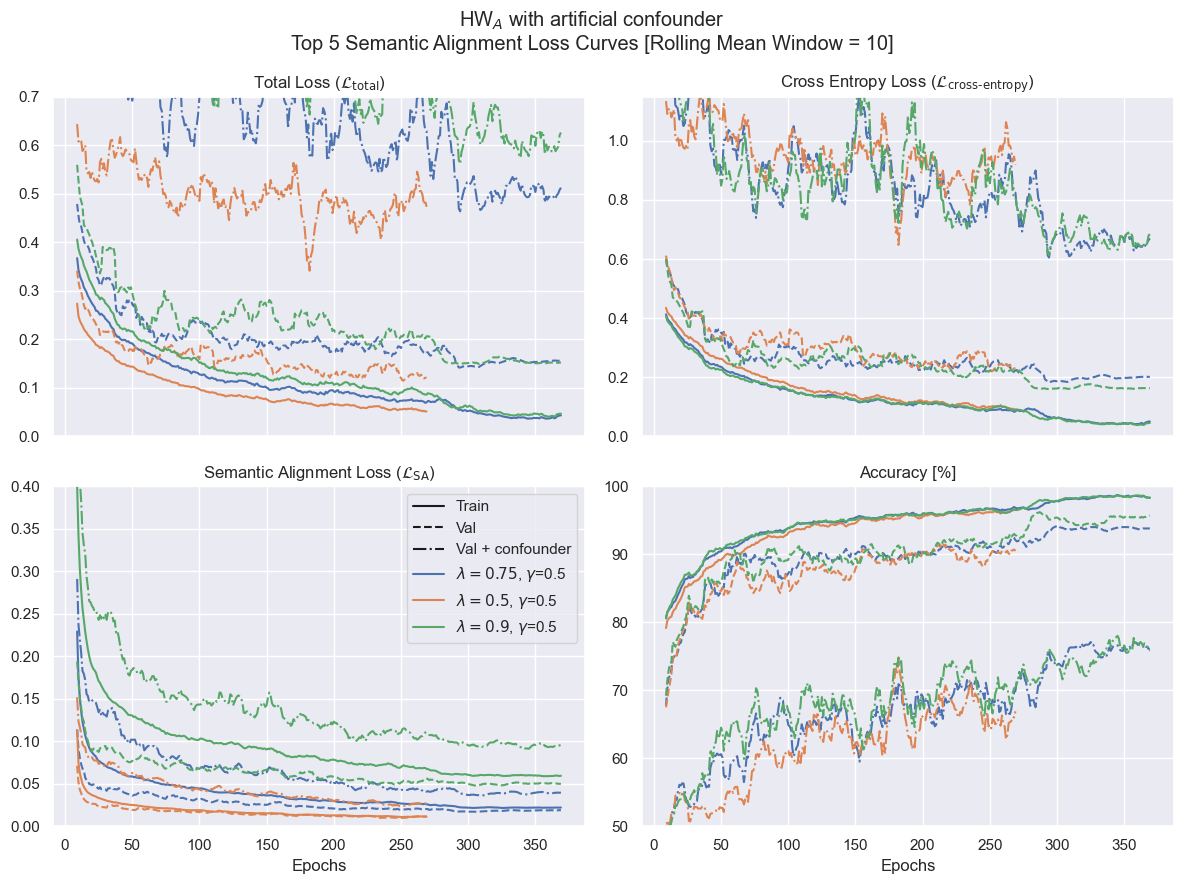

In [195]:
plot_by = lambda config: config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(
    2, 2, figsize=(12, 9), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue
    # print(config)
    lambda_ = config.get("cnt_weight", "")
    gamma = config.get("cnt_cos_weight", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), lambda_, gamma)
    # if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.16:
    #     continue
    # if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.175:
    #     continue

    ax00.plot(stat["train/mean_loss_total_a"].rolling(window=10).mean(), ls="-", c=c)
    ax00.plot(stat["val/mean_loss_total_a"].rolling(window=10).mean(), ls="--", c=c)
    ax00.plot(stat["val/mean_loss_total_spur_a"].rolling(window=10).mean(), ls="-.", c=c)

    ax01.plot(
        stat["train/mean_loss_ce_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax01.plot(stat["val/mean_loss_ce_a"].rolling(window=10).mean(), ls="--", c=c)
    ax01.plot(stat["val/mean_loss_ce_spur_a"].rolling(window=10).mean(), ls="-.", c=c)

    ax10.plot(
        stat["train/mean_loss_contrast_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax10.plot(stat["val/mean_loss_contrast_a"].rolling(window=10).mean(), ls="--", c=c)
    ax10.plot(stat["val/mean_loss_contrast_spur_a"].rolling(window=10).mean(), ls="-.", c=c)

    ax11.plot(
        stat["train/accuracy_a"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax11.plot(stat["val/accuracy_a"].rolling(window=10).mean() * 100, ls="--", c=c)
    ax11.plot(stat["val/accuracy_spur_a"].rolling(window=10).mean() * 100, ls="-.", c=c)

    idx += 1

ax00.set_title(r"Total Loss ($\mathcal{L}_\text{total}$)")
ax01.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax10.set_title(r"Semantic Alignment Loss ($\mathcal{L}_\text{SA}$)")
ax11.set_title("Accuracy [%]")

ax10.set_xlabel("Epochs")
ax11.set_xlabel("Epochs")

# for ax in (ax00, ax01, ax10, ax11):
#     xmin, xmax = ax.get_xlim()
#     ax.set_xlim(0, xmax + xmin)
ax00.set_ylim(0, 0.7)
ax01.set_ylim(0, 1.15)
ax10.set_ylim(0, 0.4)
ax11.set_ylim(50, 100)
fig.suptitle("HW$_A$ with artificial confounder\nTop 5 Semantic Alignment Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax10.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k'), Line2D([], [], ls='-.', c='k')] + handles
labels = ["Train", "Val", "Val + confounder"] + labels
ax10.legend(handles, labels)
plt.savefig(f"{fig_dir}/confounder_sa_loss_curves_top5.pdf", bbox_inches='tight')

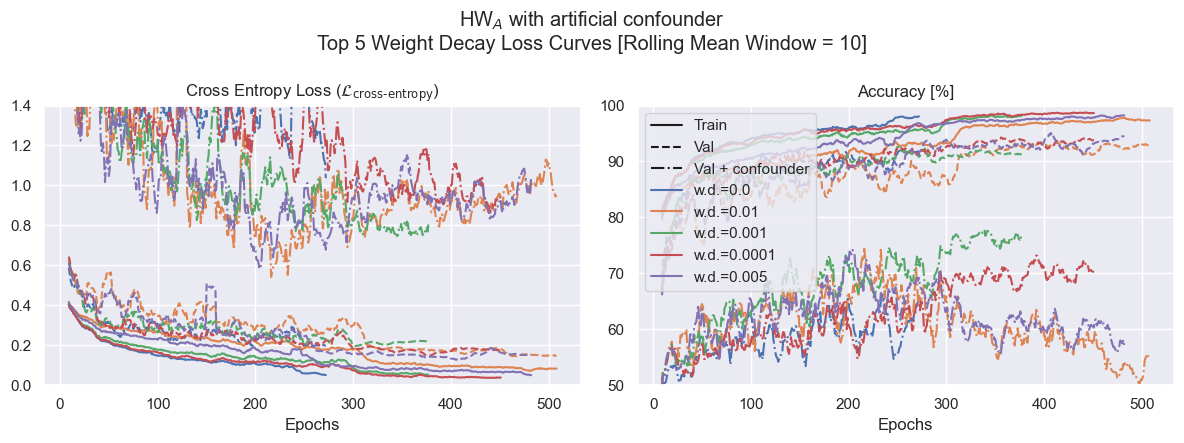

In [213]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), wd)
    # if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.5:
    #     continue
        
    ax0.plot(
        stat["train/mean_loss_ce_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_a"].rolling(window=10).mean(), ls="--", c=c)
    ax0.plot(stat["val/mean_loss_ce_spur_a"].rolling(window=10).mean(), ls="-.", c=c)

    ax1.plot(
        stat["train/accuracy_a"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_a"].rolling(window=10).mean() * 100, ls="--", c=c)
    ax1.plot(stat["val/accuracy_spur_a"].rolling(window=10).mean() * 100, ls="-.", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 1.4)
ax1.set_ylim(50, 100)
fig.suptitle("HW$_A$ with artificial confounder\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k'), Line2D([], [], ls='-.', c='k')] + handles
labels = ["Train", "Val", "Val + confounder"] + labels
ax1.legend(handles, labels, loc="upper left")
# plt.savefig(f"{fig_dir}/confounder_hwa_wd_loss_curves_top5.pdf", bbox_inches='tight')

## Quarter data

In [210]:
quarter_dir = f"{exp_dir}/quarterdata"
configs = {}
stats = {}
for run in os.listdir(quarter_dir):
    run_dir = f"{quarter_dir}/{run}"
    with open(f"{run_dir}/config.json", "r") as f:
        config = json.load(f)
    configs[run] = config
    stats[run] = pd.read_csv(f"{run_dir}/stats.csv", index_col=0)

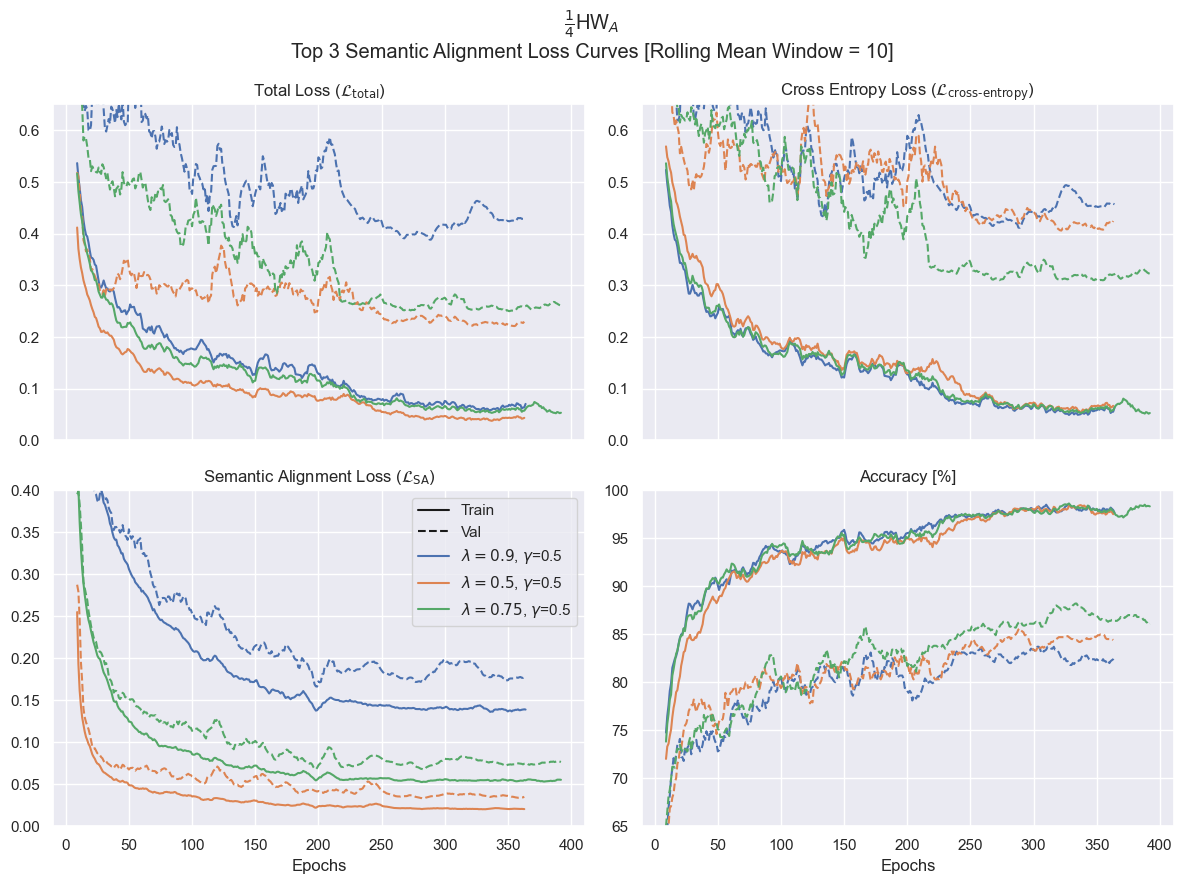

In [144]:
plot_by = lambda config: config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, ((ax00, ax01), (ax10, ax11)) = plt.subplots(
    2, 2, figsize=(12, 9), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue
    # print(config)
    lambda_ = config.get("cnt_weight", "")
    gamma = config.get("cnt_cos_weight", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), lambda_, gamma, run)
    # if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.16:
    #     continue
    # if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.4:
    #     continue

    ax00.plot(stat["train/mean_loss_total_a"].rolling(window=10).mean(), ls="-", c=c)
    ax00.plot(stat["val/mean_loss_total_a"].rolling(window=10).mean(), ls="--", c=c)

    ax01.plot(
        stat["train/mean_loss_ce_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax01.plot(stat["val/mean_loss_ce_a"].rolling(window=10).mean(), ls="--", c=c)

    ax10.plot(
        stat["train/mean_loss_contrast_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax10.plot(stat["val/mean_loss_contrast_a"].rolling(window=10).mean(), ls="--", c=c)

    ax11.plot(
        stat["train/accuracy_a"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax11.plot(stat["val/accuracy_a"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1

ax00.set_title(r"Total Loss ($\mathcal{L}_\text{total}$)")
ax01.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax10.set_title(r"Semantic Alignment Loss ($\mathcal{L}_\text{SA}$)")
ax11.set_title("Accuracy [%]")

ax10.set_xlabel("Epochs")
ax11.set_xlabel("Epochs")

# for ax in (ax00, ax01, ax10, ax11):
#     xmin, xmax = ax.get_xlim()
#     ax.set_xlim(0, xmax + xmin)
ax00.set_ylim(0, 0.65)
ax01.set_ylim(0, 0.65)
ax10.set_ylim(0, 0.4)
ax11.set_ylim(65, 100)
fig.suptitle("$\\frac{1}{4}$HW$_A$\nTop 3 Semantic Alignment Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax10.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax10.legend(handles, labels)
# plt.savefig(f"{fig_dir}/quarter_sa_loss_curves_top3.pdf", bbox_inches='tight')

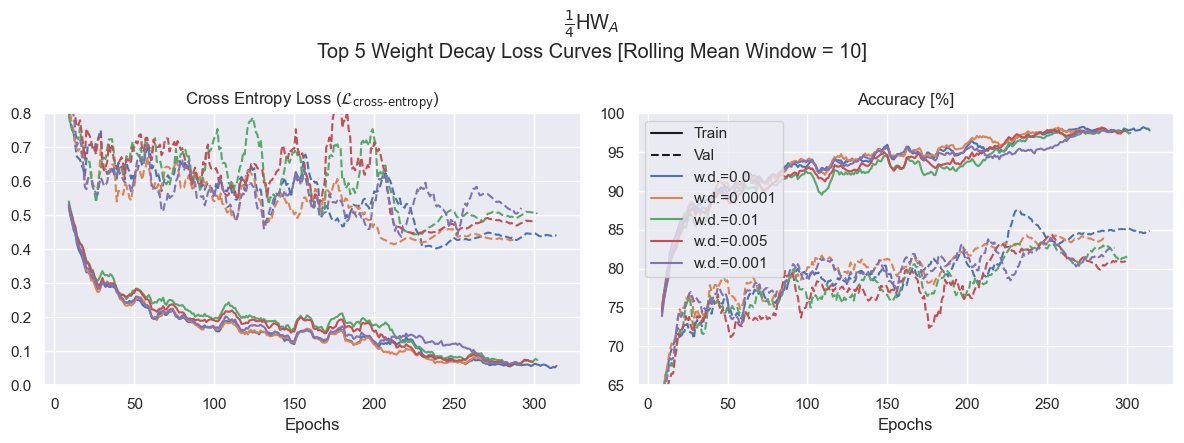

In [166]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), wd, run)
    if stat["val/mean_loss_ce_a"].dropna()[-10:].mean() > 0.6:
        continue
        
    ax0.plot(
        stat["train/mean_loss_ce_a"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_a"].rolling(window=10).mean(), ls="--", c=c)

    ax1.plot(
        stat["train/accuracy_a"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_a"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 0.8)
ax1.set_ylim(65, 100)
fig.suptitle("$\\frac{1}{4}$HW$_A$\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax1.legend(handles, labels, loc="upper left")
# plt.savefig(f"{fig_dir}/quarter_hwa_wd_loss_curves_top5.pdf", bbox_inches='tight')

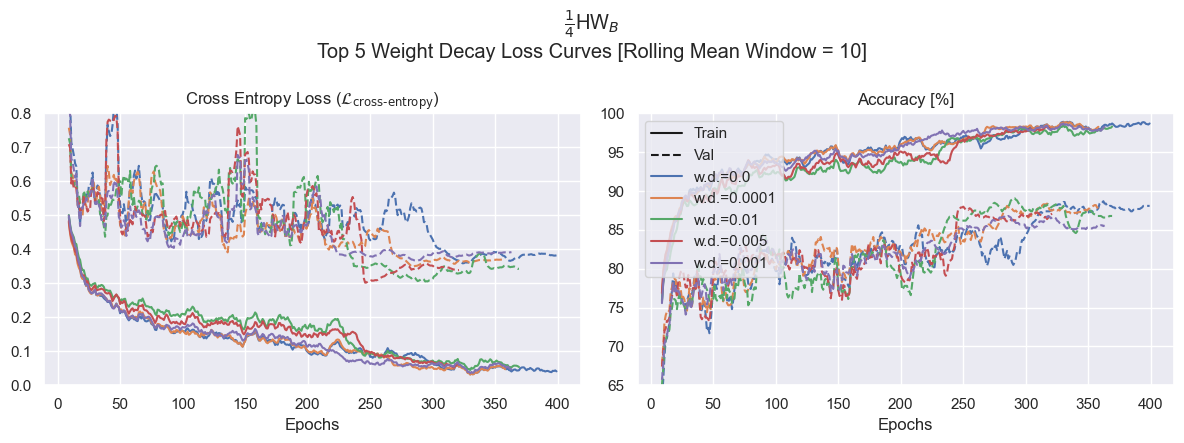

In [168]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), wd, run)
    if stat["val/mean_loss_ce_b"].dropna()[-10:].mean() > 0.51:
        continue
        
    ax0.plot(
        stat["train/mean_loss_ce_b"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_b"].rolling(window=10).mean(), ls="--", c=c)

    ax1.plot(
        stat["train/accuracy_b"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_b"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 0.8)
ax1.set_ylim(65, 100)
fig.suptitle("$\\frac{1}{4}$HW$_B$\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax1.legend(handles, labels, loc="upper left")
plt.savefig(f"{fig_dir}/quarter_hwb_wd_loss_curves_top5.pdf", bbox_inches='tight')

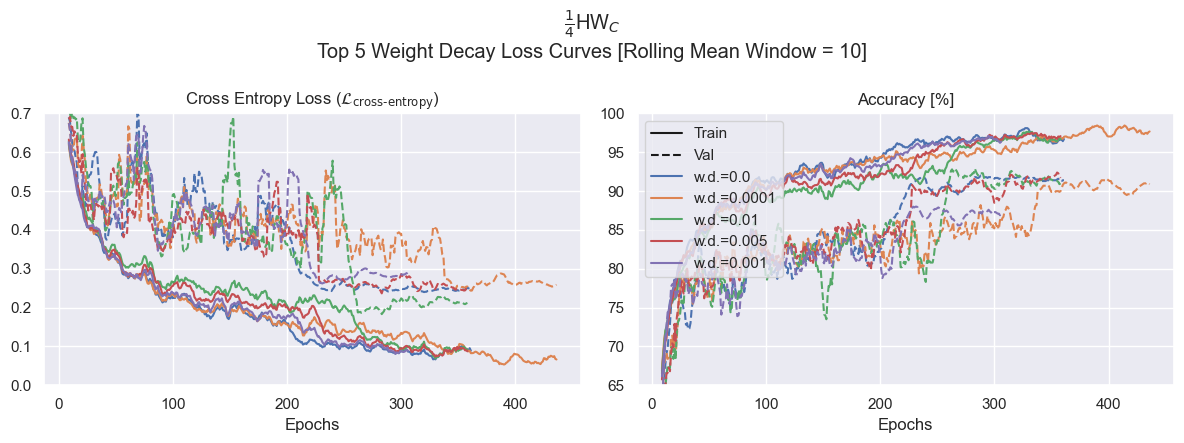

In [211]:
plot_by = lambda config: not config.get("cnt_loss", False)

cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(
    1, 2, figsize=(12, 4.5), sharex=True, sharey=False, tight_layout=True
)
idx = 0
for run in stats:
    config = configs[run]
    stat = stats[run]
    if not plot_by(config):
        continue

    wd = config.get("wd", "")
    c = cs[idx]

    # print(stat["val/mean_loss_ce_a"].dropna()[-10:].mean(), wd, run)
    if stat["val/mean_loss_ce_c"].dropna()[-10:].mean() > 0.51:
        continue
        
    ax0.plot(
        stat["train/mean_loss_ce_c"].rolling(window=10).mean(),
        ls="-",
        c=c,
        label=rf"$\lambda={lambda_}$, $\gamma$={gamma}",
    )
    ax0.plot(stat["val/mean_loss_ce_c"].rolling(window=10).mean(), ls="--", c=c)

    ax1.plot(
        stat["train/accuracy_c"].rolling(window=10).mean() * 100,
        ls="-",
        c=c,
        label=rf"w.d.={wd}",
    )
    ax1.plot(stat["val/accuracy_c"].rolling(window=10).mean() * 100, ls="--", c=c)

    idx += 1


ax0.set_title(r"Cross Entropy Loss ($\mathcal{L}_\text{cross-entropy}$)")
ax1.set_title("Accuracy [%]")

ax0.set_xlabel("Epochs")
ax1.set_xlabel("Epochs")

ax0.set_ylim(0, 0.7)
ax1.set_ylim(65, 100)
fig.suptitle("$\\frac{1}{4}$HW$_C$\nTop 5 Weight Decay Loss Curves [Rolling Mean Window = 10]")

handles, labels = ax1.get_legend_handles_labels()
handles = [Line2D([], [], ls='-', c='k'), Line2D([], [], ls='--', c='k')] + handles
labels = ["Train", "Val"] + labels
ax1.legend(handles, labels, loc="upper left")
plt.savefig(f"{fig_dir}/quarter_hwc_wd_loss_curves_top5.pdf", bbox_inches='tight')

# BugNIST 

## Classification

## Segmentation

In [9]:
model_dir = "../models/bn-seg-checkpoints"
stats_ind = pd.read_csv(f"{model_dir}/run-20240607-112444/stats.csv", index_col=0)
stats_synth = pd.read_csv(f"{model_dir}/run-synth/stats.csv", index_col=0)[-80:]
display(stats_ind.head())
display(stats_synth.head())

,train_loss,train_accuracy,val_loss,val_accuracy,epoch
0,1.725265,0.882147,1.094155,0.994977,NaN
1,1.061618,0.994913,1.032361,0.995335,NaN
2,1.024869,0.995254,1.006725,0.995293,NaN
3,1.002759,0.995484,0.988694,0.996279,NaN
4,0.985394,0.995759,0.985453,0.995481,NaN


,train_loss,train_accuracy,val_loss,val_accuracy,epoch
1,0.883988,0.997742,0.869561,0.999199,1.0
2,0.863111,0.998133,0.872499,0.999099,2.0
3,0.859125,0.998237,0.867333,0.999271,3.0
4,0.855293,0.998319,0.867745,0.999284,4.0
5,0.854305,0.998350,0.867106,0.999269,5.0


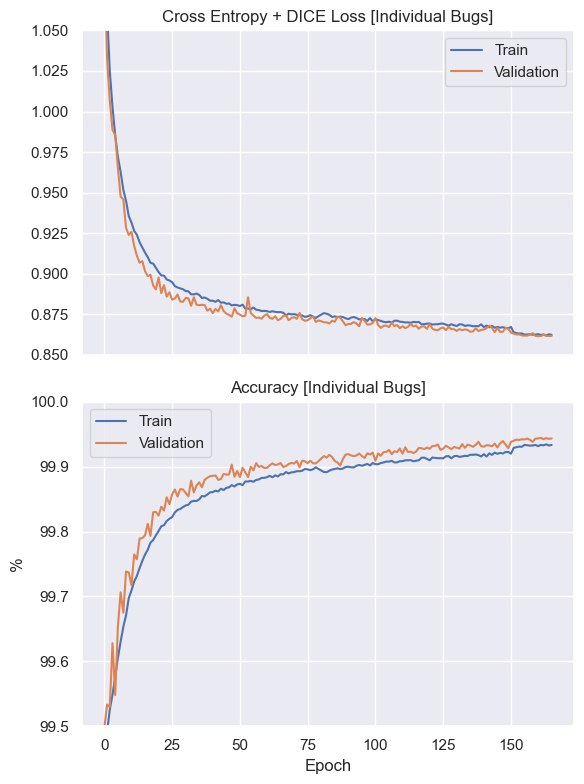

In [64]:
sns.set_theme()
cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True, sharex=True)
ax0.plot(stats_ind["train_loss"], c=cs[0], label="Train")
ax0.plot(stats_ind["val_loss"], c=cs[1], label="Validation")
ax0.set_ylim((0.85, 1.05))
ax0.set_title("Cross Entropy + DICE Loss [Individual Bugs]")
ax0.legend()
ax1.plot(stats_ind["train_accuracy"] * 100, label="Train")
ax1.plot(stats_ind["val_accuracy"] * 100, label="Validation")
# ax0.set_ylim((0.85, 1.05))
ax1.set_title("Accuracy [Individual Bugs]")
ax1.set_ylim((99.5, 100))
ax1.set_xlabel("Epoch")
ax1.set_ylabel("%")

ax1.legend()
# plt.savefig(f"{fig_dir}/segmentation_curves_individual.pdf", bbox_inches='tight')
plt.show()

# plt.xlim((0, len(stats_ind)))

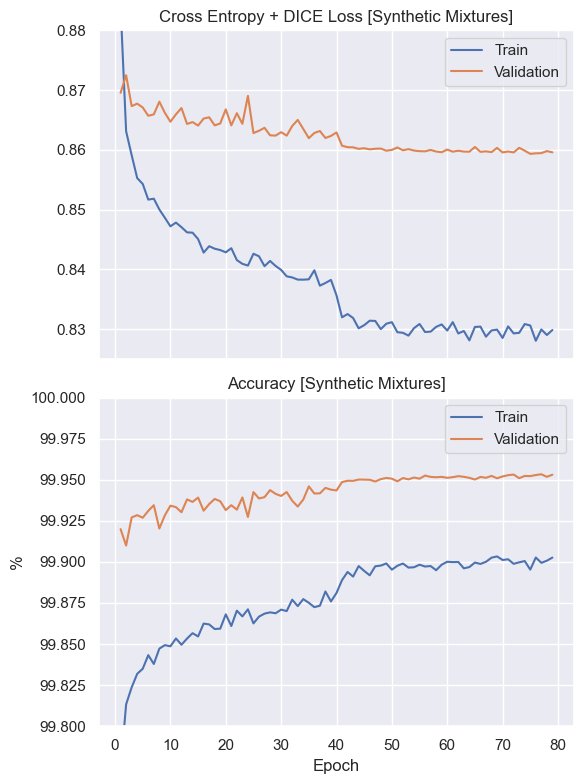

In [71]:
sns.set_theme()
cs = sns.color_palette().as_hex()
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(6, 8), tight_layout=True, sharex=True)
ax0.plot(stats_synth["train_loss"], c=cs[0], label="Train")
ax0.plot(stats_synth["val_loss"], c=cs[1], label="Validation")
ax0.set_ylim((0.825, 0.88))
ax0.set_title("Cross Entropy + DICE Loss [Synthetic Mixtures]")
ax0.legend()
ax1.plot(stats_synth["train_accuracy"] * 100, label="Train")
ax1.plot(stats_synth["val_accuracy"] * 100, label="Validation")
# ax0.set_ylim((0.85, 1.05))
ax1.set_title("Accuracy [Synthetic Mixtures]")
ax1.set_ylim((99.8, 100))
ax1.set_xlabel("Epoch")
ax1.set_ylabel("%")

ax1.legend()
# plt.savefig(f"{fig_dir}/segmentation_curves_synthmix.pdf", bbox_inches='tight')
plt.show()

# plt.xlim((0, len(stats_ind)))